In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

## Dataset

In [2]:
dataset = pd.read_csv("citibike.csv")

In [3]:
dataset.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,3117,8/1/2015 01:19:15,8/1/2015 02:11:12,301,E 2 St & Avenue B,40.722174,-73.983688,301,E 2 St & Avenue B,40.722174,-73.983688,18070,Subscriber,1986.0,1
1,690,8/1/2015 01:27:30,8/1/2015 01:39:00,301,E 2 St & Avenue B,40.722174,-73.983688,349,Rivington St & Ridge St,40.718502,-73.983299,19699,Subscriber,1985.0,1
2,727,8/1/2015 01:38:49,8/1/2015 01:50:57,301,E 2 St & Avenue B,40.722174,-73.983688,2010,Grand St & Greene St,40.721655,-74.002347,20953,Subscriber,1982.0,1
3,698,8/1/2015 06:06:41,8/1/2015 06:18:20,301,E 2 St & Avenue B,40.722174,-73.983688,527,E 33 St & 2 Ave,40.744023,-73.976056,23566,Subscriber,1976.0,1
4,351,8/1/2015 06:24:29,8/1/2015 06:30:21,301,E 2 St & Avenue B,40.722174,-73.983688,250,Lafayette St & Jersey St,40.724561,-73.995653,17545,Subscriber,1959.0,1


In [4]:
dataset.shape

(4212, 15)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 15 columns):
tripduration               4212 non-null int64
starttime                  4212 non-null object
stoptime                   4212 non-null object
start station id           4212 non-null int64
start station name         4212 non-null object
start station latitude     4212 non-null float64
start station longitude    4212 non-null float64
end station id             4212 non-null int64
end station name           4212 non-null object
end station latitude       4212 non-null float64
end station longitude      4212 non-null float64
bikeid                     4212 non-null int64
usertype                   4212 non-null object
birth year                 3682 non-null float64
gender                     4212 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 493.7+ KB


In [6]:
orig_x = dataset.iloc[:,5].values
orig_y = dataset.iloc[:,6].values
lat = dataset.iloc[:,9].values
long = dataset.iloc[:,10].values
min_lat = min(lat)
max_lat = max(lat)
min_long = min(long)
max_long = max(long)

In [7]:
orig_x,orig_y

(array([40.72217444, 40.72217444, 40.72217444, ..., 40.72217444,
        40.72217444, 40.72217444]),
 array([-73.98368779, -73.98368779, -73.98368779, ..., -73.98368779,
        -73.98368779, -73.98368779]))

[]

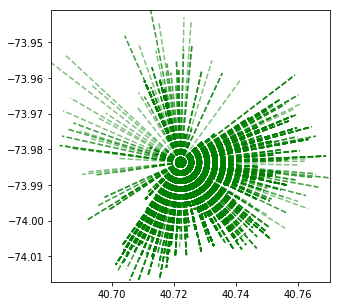

In [8]:
plt.figure(figsize=(5,5))
plt.plot([orig_x,lat],[orig_y,long],'--', c = 'g',alpha = 0.5)
plt.xlim(min_lat,max_lat)
plt.ylim(min_long,max_long)
plt.plot()

In [9]:
min_lat,min_long

(40.680342423, -74.01713445)

In [10]:
max_lat,max_long

(40.770513, -73.94100005)

In [11]:
MAP = plt.imread("map.png")

In [12]:
MAP.shape

(836, 534, 4)

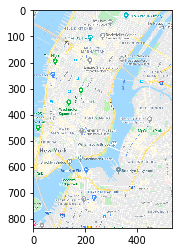

In [13]:
plt.imshow(MAP)

[]

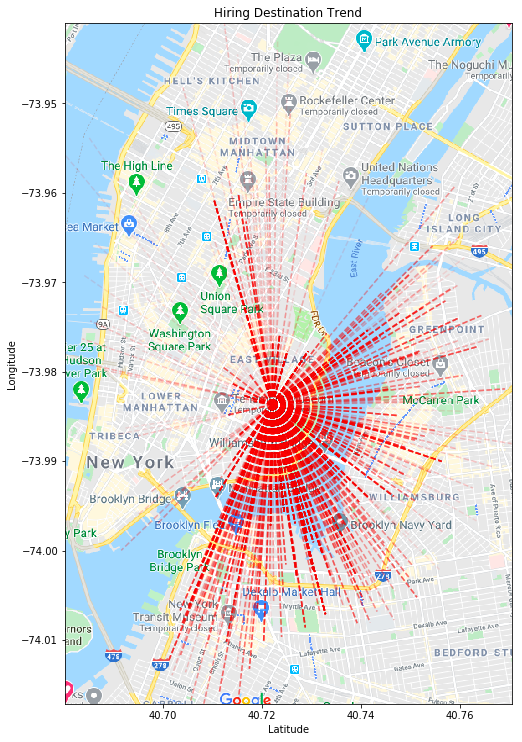

In [14]:
asp_ratio = MAP.shape[0]/MAP.shape[1]
size = 8
plt.figure(figsize=(size,asp_ratio*size))
plt.title("Hiring Destination Trend")
plt.plot([orig_x,lat],[orig_y,long],'--', c = 'r',alpha = 0.1)
plt.imshow(MAP,extent=[min_lat,max_lat,min_long,max_long], aspect="auto")
plt.xlim(min_lat,max_lat)
plt.ylim(min_long,max_long)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.plot()

In [15]:
timestamps = dataset['starttime'].values

In [16]:
rows=[]
for timestamp in timestamps:
    row=[]
    #print(timestamp)
    seq=str()
    for ch in timestamp:
        #print(ch)
        if ch != '/' and ch != ' ' and ch != ':':
            #print(ch)
            seq=seq+ch
            
        else:
            seq = int(seq)
            row.append(seq)
            seq=str()
    seq = int(seq)
    row.append(seq)
    seq=str()
    day=calendar.weekday(row[2],row[0],row[1])
    row.append(day)
    
    rows.append(row)
rows=np.array(rows)

In [17]:
rows.shape

(4212, 7)

In [18]:
data = pd.DataFrame(rows, columns=['MM','DD','YYYY','HH','mm','SS','Day'])

In [19]:
data.head()

,MM,DD,YYYY,HH,mm,SS,Day
0,8,1,2015,1,19,15,5
1,8,1,2015,1,27,30,5
2,8,1,2015,1,38,49,5
3,8,1,2015,6,6,41,5
4,8,1,2015,6,24,29,5


In [20]:
date_dict={}
for row in rows:
    d = row[1]
    hr = row [3]
    
    if hr>=0 and hr<3:
        hr = 0
        
    elif hr>=3 and hr<6:
        hr = 3
        
    elif hr>=6 and hr<9:
        hr = 6
        
    elif hr>=9 and hr<12:
        hr = 9
        
    elif hr>=12 and hr<15:
        hr = 12
    
    elif hr>=15 and hr<18:
        hr = 15
    
    elif hr>=18 and hr<21:
        hr = 18
        
    elif hr>=21 and hr<24:
        hr = 21
        
    
        
    
    
    if d not in date_dict:
        date_dict[d] = [hr]
    else:
        date_dict[d].append(hr)

In [21]:
rows_1=[]
for date in date_dict:
    hrs={
        0:0,
        3:0,
        6:0,
        9:0,
        12:0,
        15:0,
        18:0,
        21:0
    }
    for hr in date_dict[date]:
        hrs[hr]=hrs[hr]+1
        
    day=calendar.weekday(2015,8,date)
    
    for hr in hrs:
        row = [date,hr,day,hrs[hr]]
        rows_1.append(row)

rows_1 = np.array(rows_1)

In [22]:
transformed_data = pd.DataFrame(rows_1, columns=['DD','HH','Day','Rentals'])

In [23]:
transformed_data.head()

,DD,HH,Day,Rentals
0,1,0,5,3
1,1,3,5,0
2,1,6,5,9
3,1,9,5,41
4,1,12,5,39


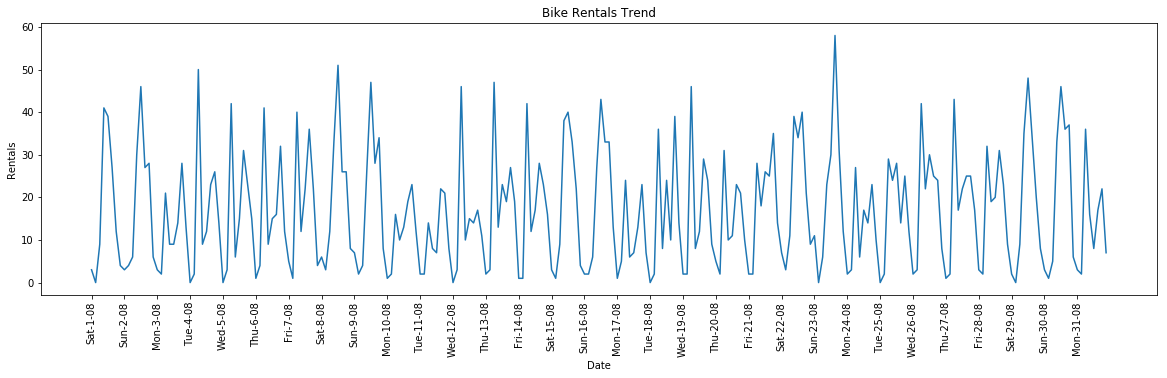

In [24]:
ticks=[calendar.day_name[calendar.weekday(2015,8,i)][:3]+'-'+str(i)+'-08' for i in range(1,32)]
plt.figure(figsize=(20,5))
plt.title("Bike Rentals Trend")
plt.plot(transformed_data['Rentals'].values)
plt.xticks(range(0,248,8), ticks, rotation =90)
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.show()

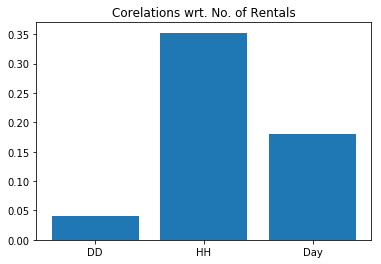

In [25]:
plt.figure()
plt.title("Corelations wrt. No. of Rentals")
plt.bar(transformed_data.corr().iloc[-1,:-1].keys(),transformed_data.corr().iloc[-1,:-1].values)
plt.show()

In [26]:
transformed_data['Day']=transformed_data['Day'].astype(str)
transformed_data['HH']=transformed_data['HH'].astype(str)

In [27]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
DD         248 non-null int64
HH         248 non-null object
Day        248 non-null object
Rentals    248 non-null int64
dtypes: int64(2), object(2)
memory usage: 7.8+ KB


In [29]:
data_dummies = pd.get_dummies(transformed_data)

In [30]:
data_dummies.head()

,DD,Rentals,HH_0,HH_12,HH_15,HH_18,HH_21,HH_3,HH_6,HH_9,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,9,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1,41,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,39,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
train_data = data_dummies.iloc[:185]
test_data = data_dummies.iloc[185:]

In [36]:
X_train = train_data.drop(columns=['Rentals']).values
y_train = train_data['Rentals'].values
X_test = test_data.drop(columns=['Rentals']).values
y_test = test_data['Rentals'].values

In [37]:
X_train.shape

(185, 16)

In [38]:
X_train

array([[ 1,  1,  0, ...,  0,  1,  0],
       [ 1,  0,  0, ...,  0,  1,  0],
       [ 1,  0,  0, ...,  0,  1,  0],
       ...,
       [23,  0,  0, ...,  0,  0,  1],
       [23,  0,  0, ...,  0,  0,  1],
       [24,  1,  0, ...,  0,  0,  0]])

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rfr = RandomForestRegressor(n_estimators=50)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
rfr.score(X_train, y_train)

0.9497813724914972

In [52]:
rfr.score(X_test,y_test)

0.7628014669556745

In [64]:
train_pred = rfr.predict(X_train)
test_pred = rfr.predict(X_test)

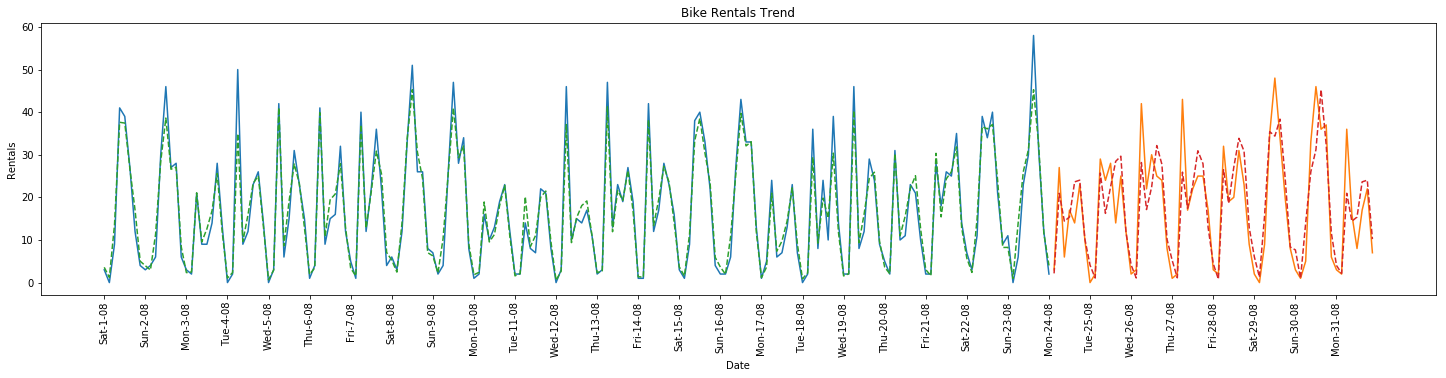

In [79]:
ticks=[calendar.day_name[calendar.weekday(2015,8,i)][:3]+'-'+str(i)+'-08' for i in range(1,32)]
plt.figure(figsize=(25,5))
plt.title("Bike Rentals Trend")
plt.plot(range(0,185),y_train)
plt.plot(range(185,248),y_test)


plt.plot(range(0,185),train_pred, '--')
plt.plot(range(185,248),test_pred, '--')

plt.xticks(range(0,248,8), ticks, rotation =90)
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.show()

In [93]:
np.sqrt(np.sum(np.square(test_pred-y_test))/y_test.shape[0])

6.409488501990064

In [ ]:
def model_performance(model, )